# ConvNext

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Training Techniques

- **Training Epochs**
    - 300 epochs (from the original 90 epochs for ResNets)
- **Optimizer**
    - AdamW
- **Data augmentation**
    - Mixup
    - Cutmix
    - RandAugment
    - Random Erasing
- **Regularization**
    - Stochastic Depth
    - Label Smoothing
    
- **ConvNeXt-T**: C = (96, 192, 384, 768), B = (3, 3, 9, 3)
    - Swin-T's computation ratio of each stage is 1:1:3:1

In [3]:
from tensorflow import keras
import convnext

In [4]:
model = convnext.ConvNeXtTiny()

Metal device set to: Apple M2


2023-03-21 23:46:02.382449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-21 23:46:02.383073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.summary(expand_nested=True)

Model: "convnext_tiny"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_tiny_prestem_normaliz  (None, 224, 224, 3)  0          ['input_1[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_tiny_stem (Sequential  (None, 56, 56, 96)  4896        ['convnext_tiny_prestem_normaliza
 )                                                               tion[0][0]']         

 convnext_tiny_stage_0_block_2_  (None, 56, 56, 96)  96          ['convnext_tiny_stage_0_block_2_p
 layer_scale (LayerScale)                                        ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_tiny_stage_0_block_2_  (None, 56, 56, 96)  0           ['convnext_tiny_stage_0_block_2_l
 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_2 (TFOpLa  (None, 56, 56, 96)  0           ['tf.__operators__.add_1[0][0]', 
 mbda)                                                            'convnext_tiny_stage_0_block_2_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_

 pointwise_conv_2 (Dense)                                        elu[0][0]']                      
                                                                                                  
 convnext_tiny_stage_1_block_2_  (None, 28, 28, 192)  192        ['convnext_tiny_stage_1_block_2_p
 layer_scale (LayerScale)                                        ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_tiny_stage_1_block_2_  (None, 28, 28, 192)  0          ['convnext_tiny_stage_1_block_2_l
 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_5 (TFOpLa  (None, 28, 28, 192)  0          ['tf.__operators__.add_4[0][0]', 
 mbda)                                                            'convnext_tiny_stage_1_block_2_i
          

                                                                                                  
 convnext_tiny_stage_2_block_2_  (None, 14, 14, 384)  590208     ['convnext_tiny_stage_2_block_2_g
 pointwise_conv_2 (Dense)                                        elu[0][0]']                      
                                                                                                  
 convnext_tiny_stage_2_block_2_  (None, 14, 14, 384)  384        ['convnext_tiny_stage_2_block_2_p
 layer_scale (LayerScale)                                        ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_tiny_stage_2_block_2_  (None, 14, 14, 384)  0          ['convnext_tiny_stage_2_block_2_l
 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__oper

 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 14, 14, 384)  0          ['tf.__operators__.add_10[0][0]',
 ambda)                                                           'convnext_tiny_stage_2_block_5_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_tiny_stage_2_block_6_  (None, 14, 14, 384)  19200      ['tf.__operators__.add_11[0][0]']
 depthwise_conv (Conv2D)                                                                          
                                                                                                  
 convnext_tiny_stage_2_block_6_  (None, 14, 14, 384)  768        ['convnext_tiny_stage_2_block_6_d
 layernorm

|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| convnext_tiny_downsampling_lay  (None, 14, 14, 384)  768      []                               |
| ernorm_2 (LayerNormalization)                                                                  |
|                                                                                                |
| convnext_tiny_downsampling_con  (None, 7, 7, 768)  1180416    []                               |
| v_2 (Conv2D)                                                                                   |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 convnext_tiny_stage_3_block_0_  (None, 7, 7, 768)   38400       ['convnext_tiny_downsampling_bloc
 depthwise_conv (Conv2D)                                         k_2[0][0]']                      
                                                                                                  
 convnext_

 convnext_tiny_head_gap (Global  (None, 768)         0           ['tf.__operators__.add_17[0][0]']
 AveragePooling2D)                                                                                
                                                                                                  
 convnext_tiny_head_layernorm (  (None, 768)         1536        ['convnext_tiny_head_gap[0][0]'] 
 LayerNormalization)                                                                              
                                                                                                  
 convnext_tiny_head_dense (Dens  (None, 1000)        769000      ['convnext_tiny_head_layernorm[0]
 e)                                                              [0]']                            
                                                                                                  
Total params: 28,589,128
Trainable params: 28,589,128
Non-trainable params: 0
_______________________________

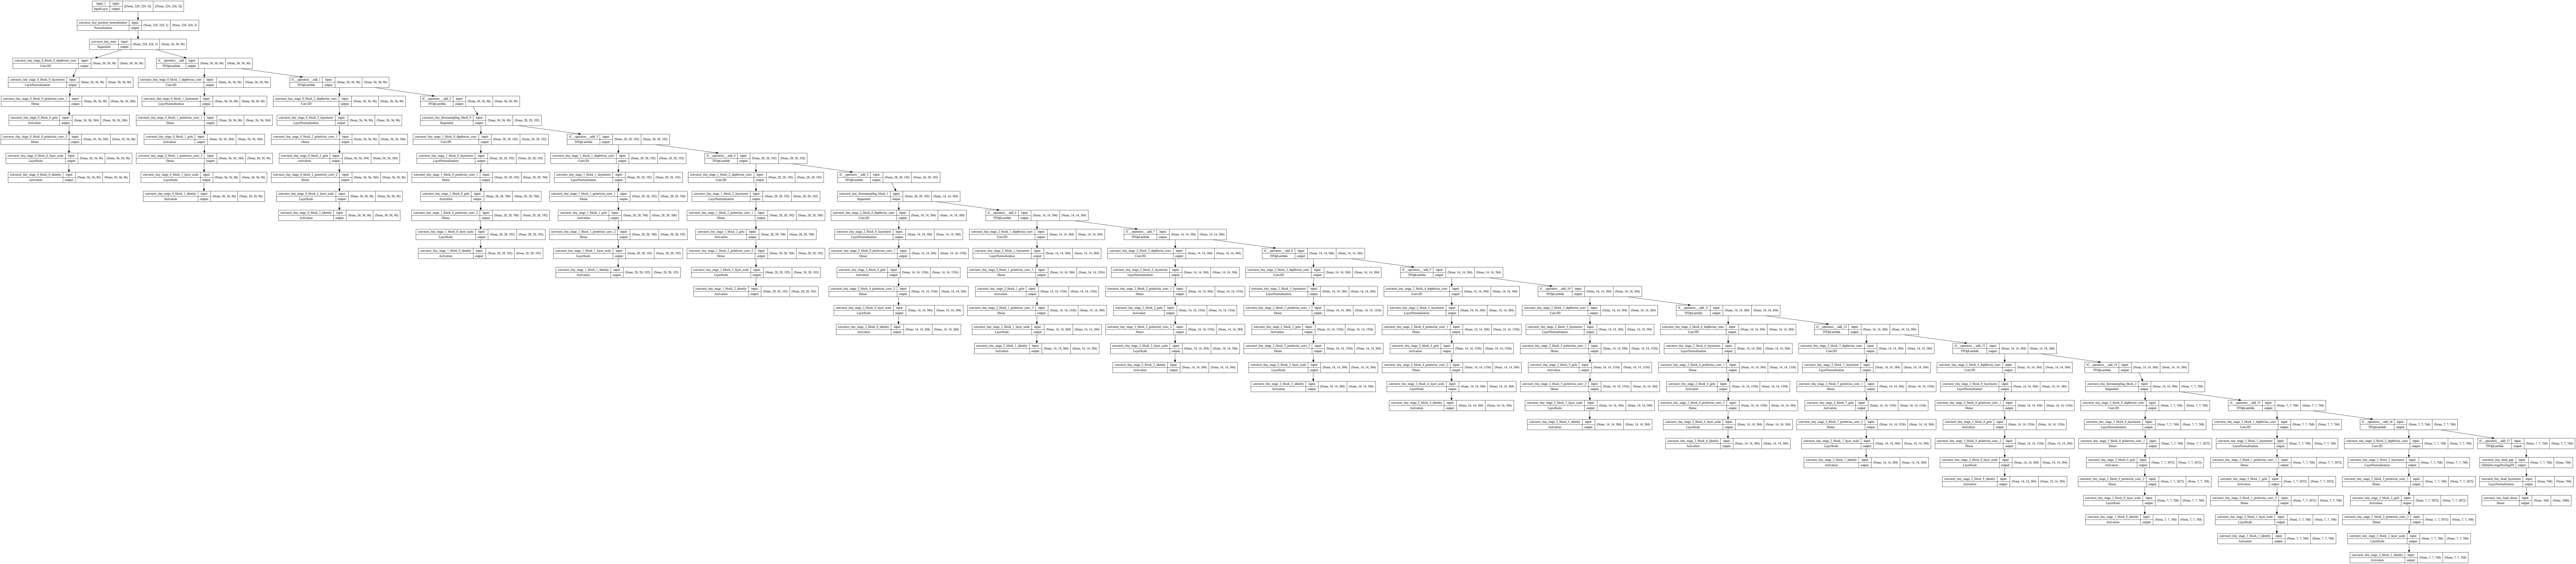

In [9]:
keras.utils.plot_model(model=model,
                       to_file='ConvNexT_tiny.png',
                       show_shapes=True
                      )

# Modeling

In [7]:
import numpy as np
import tensorflow.compat.v2 as tf

from keras import backend
from keras import layers
from keras import utils
from keras.applications import imagenet_utils
from keras.engine import sequential
from keras.engine import training as training_lib

from tensorflow.python.util.tf_export import keras_export

In [ ]:
def ConvNeXtBlock(projection_dim, drop_path_rate=0.0, layer_scale_init_value=1e-6, name=None):

    """ 
    Args -
    projection_dim (int): Number of filters for convolution layers
    drop_path_rate (float): Probability of dropping paths. Should be within [0, 1]
    layer_scale_init_value (float) : Layer scale value. Should be a small float number
    name: name to path to the keras layer

    Returns -
    A function representing a ConvNeXtBlock block
    """
    if name is None:
        name = "prestem" + str(backend.get_uid("prestem"))
        
        

In [ ]:
model_convnext_t = ConvNextBlock(depths=[3, 3, 9, 3]
                                 
                                )